In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dashboard

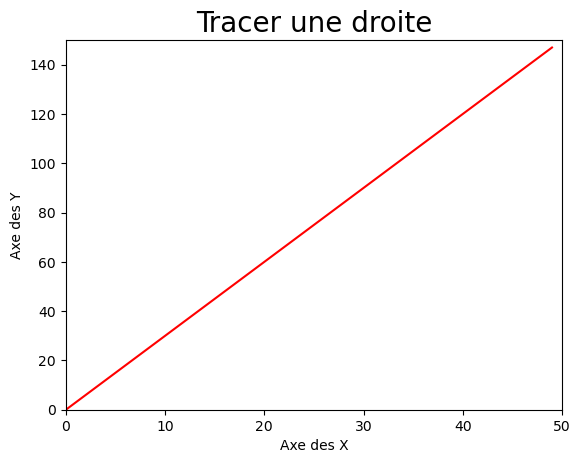

In [19]:
## Courbe 1 - droite y = 3x

def f(x):
    return 3*x

axes = plt.gca()
axes.set_xlim(0,50)
axes.set_xlabel('Axe des X')
axes.set_ylabel('Axe des Y')
axes.set_ylim(0,150)
axes.set_title("Tracer une droite", fontsize = 20)

plt.plot([f(x) for x in range(50)], color="r")

plt.show()

In [26]:
# Récupération du fichier 
sales_csv = pd.read_csv('company_sales_data.csv')

print(sales_csv.shape)
sales_csv.head()

(12, 9)


,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600


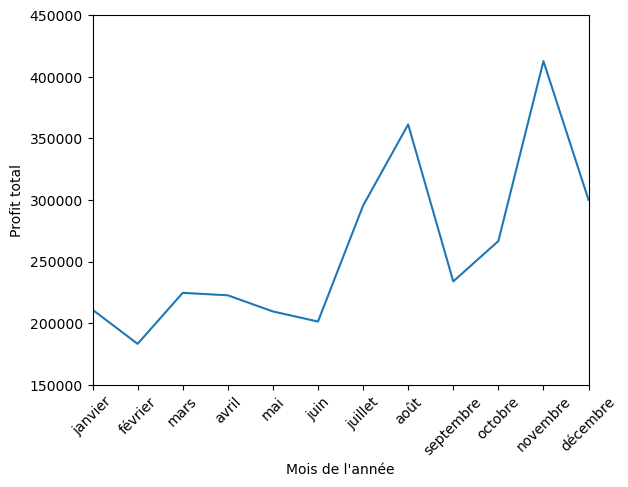

In [35]:
# Courbe 2 - Profit total réalisé chaque mois
axes = plt.gca()
axes.set_xlabel("Mois de l'année")
axes.set_ylabel('Profit total')
plt.xlim([1, 12])
plt.ylim([150000, 450000])
plt.plot(sales_csv['month_number'], sales_csv['total_profit'])
months_names = ['janvier', 'février', 'mars', 'avril', 'mai', 'juin', 'juillet', 'août', 'septembre', 'octobre', 'novembre', 'décembre']
plt.xticks(sales_csv["month_number"], months_names, rotation = 45)
plt.show()

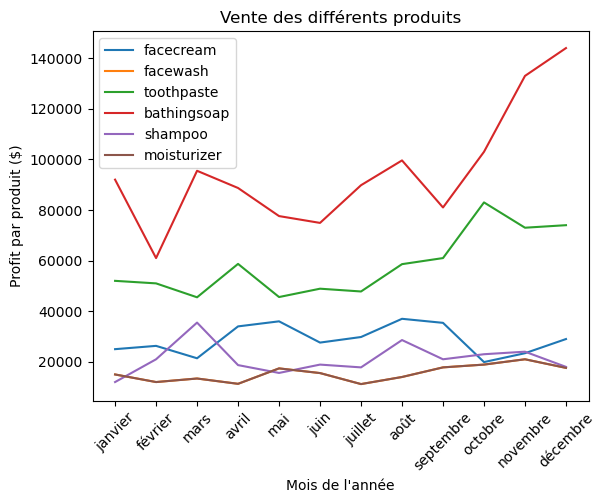

In [36]:
# Courbe 3 - Visualisation des ventes totales des différents produits
axes = plt.gca()
axes.set_xlabel("Mois de l'année")
axes.set_ylabel('Profit par produit ($)')
plt.plot(sales_csv['month_number'], sales_csv['facecream']*10, label="facecream") #on multiplie par 10 pour avoir le profit
plt.plot(sales_csv['month_number'], sales_csv['facewash']*10, label='facewash')
plt.plot(sales_csv['month_number'], sales_csv['toothpaste']*10, label='toothpaste')
plt.plot(sales_csv['month_number'], sales_csv['bathingsoap']*10, label="bathingsoap")
plt.plot(sales_csv['month_number'], sales_csv['shampoo']*10, label="shampoo")
plt.plot(sales_csv['month_number'], sales_csv['moisturizer']*10, label="moisturizer")
months_names = ['janvier', 'février', 'mars', 'avril', 'mai', 'juin', 'juillet', 'août', 'septembre', 'octobre', 'novembre', 'décembre']
plt.xticks(sales_csv["month_number"], months_names, rotation = 45)
plt.legend()
plt.title('Vente des différents produits')
plt.show()

In [46]:
#Graphe 4

#Préparation de la table
sales_csv_red = sales_csv.drop(columns =['total_units', 'total_profit', 'month_number'])
sales_csv_red['month']=['janvier', 'février', 'mars', 'avril', 'mai', 'juin', 'juillet', 'août', 'septembre', 'octobre', 'novembre', 'décembre']
sales_csv_red.set_index('month',inplace= True)
sales_csv_red.head()

,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer
month,,,,,,
janvier,2500,1500,5200,9200,1200,1500
février,2630,1200,5100,6100,2100,1200
mars,2140,1340,4550,9550,3550,1340
avril,3400,1130,5870,8870,1870,1130
mai,3600,1740,4560,7760,1560,1740


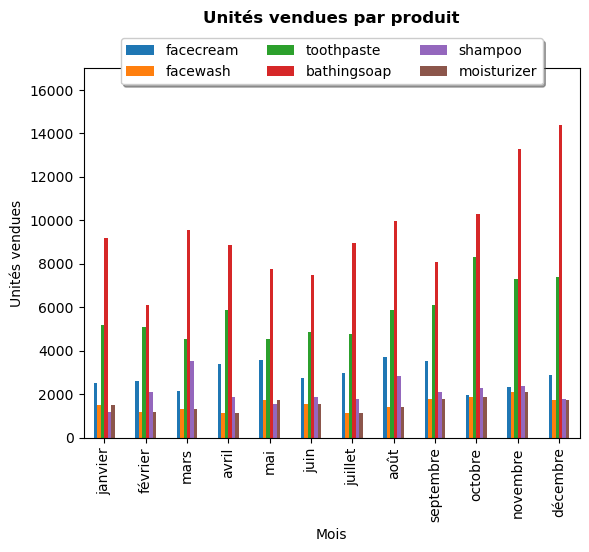

In [47]:
#Créer le graphique
sales_csv_red.plot(kind='bar')

plt.xlabel('Mois')
plt.ylabel('Unités vendues')

plt.title('Unités vendues par produit', x=0.5, y=1.1, fontweight="bold")

plt.ylim([0,17000])

ax = plt.subplot(111)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3, fancybox=True, shadow=True)

plt.show()

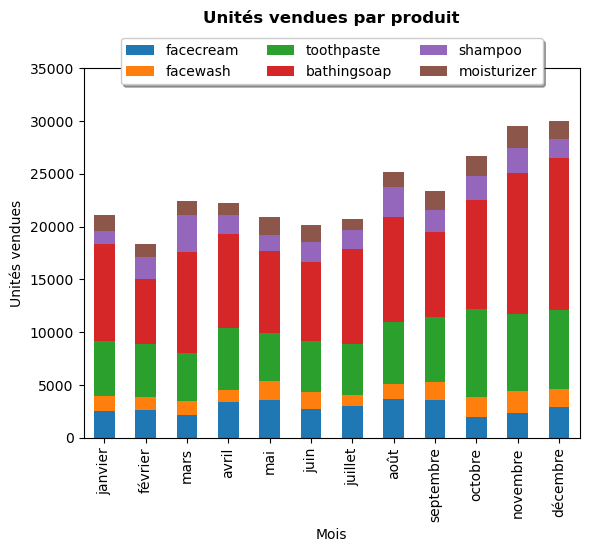

In [51]:
#Option en bar-stacked
sales_csv_red.plot(kind='bar',stacked=True)
plt.xlabel('Mois')
plt.ylabel('Unités vendues')

plt.title('Unités vendues par produit', x=0.5, y=1.1, fontweight="bold")

plt.ylim([0,35000])

ax = plt.subplot(111)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3, fancybox=True, shadow=True)

plt.show()

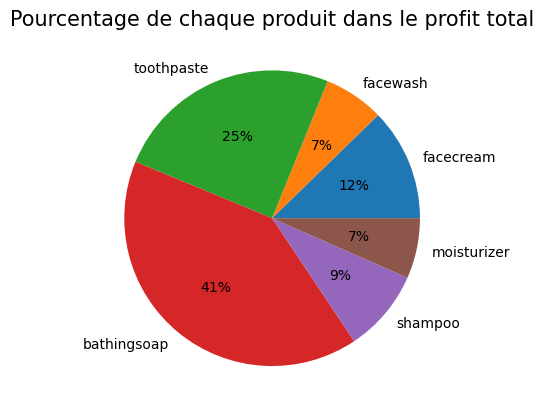

In [77]:
#Graphe 5 - % de chaque produit dans le profit
X = sales_csv.sum()
labels=["facecream","facewash","toothpaste","bathingsoap","shampoo","moisturizer"]
plt.pie(X[1:7],autopct='%1.0f%%',labels=labels)
plt.title('Pourcentage de chaque produit dans le profit total', fontsize = 15)
plt.show()

## Passons au deuxième jeu de données

In [148]:
customers_csv = pd.read_csv('customers.csv')
products_csv = pd.read_csv("products.csv")
transactions_csv = pd.read_csv('transactions.csv')
customers_csv.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [83]:
products_csv.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [84]:
transactions_csv.head()

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


In [101]:
#Courbe 7 - répartition des produits par catégorie

nb_item = products_csv.groupby('categ').count().drop(columns=['price'])
nb_item

,id_prod
categ,
0,2309
1,739
2,239


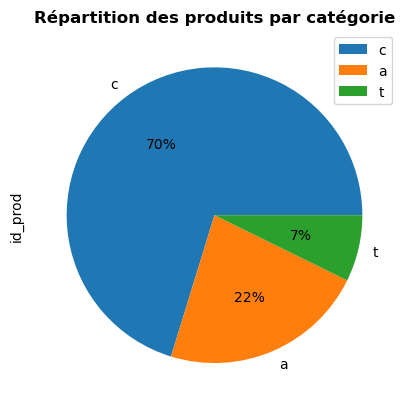

In [103]:
nb_item.plot.pie(y='id_prod', autopct='%1.0f%%', labels='categ')
plt.title('Répartition des produits par catégorie', x=0.5, y=1, fontweight="bold")

plt.show()

In [149]:
#Courbe 8 - CA par catégorie de produits

transactions_csv = pd.merge(transactions_csv, products_csv, on="id_prod", how='left')
transactions_csv.head()

,id_prod,date,session_id,client_id,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2.0
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,10.71,1.0
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,4.20,0.0
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,8.99,0.0


In [153]:
transactions_csv['month_year']=pd.to_datetime(transactions_csv['date'].str[:7],format='%Y%m',errors='ignore')
transactions_csv.drop(columns='date',inplace=True)
transactions_csv.head()

,id_prod,session_id,client_id,price,categ,month_year
0,0_1483,s_18746,c_4450,4.99,0.0,2021-04
1,2_226,s_159142,c_277,65.75,2.0,2022-02
2,1_374,s_94290,c_4270,10.71,1.0,2021-09
3,0_2186,s_105936,c_4597,4.20,0.0,2021-10
4,0_1351,s_63642,c_1242,8.99,0.0,2021-07


In [154]:
transactions_csv['CA']= transactions_csv.groupby(['month_year','categ'])['price'].transform('sum')
transactions_csv.head(20)
transac_categ = transactions_csv[['categ', 'month_year', 'CA']]
transac_categ = transac_categ.drop_duplicates().dropna()

In [155]:
transac_categ = transac_categ.drop(1431)

In [156]:
transac_categ0 = transac_categ.loc[transac_categ['categ'] == 0.0].sort_values('month_year')
transac_categ1 = transac_categ.loc[transac_categ['categ'] == 1.0].sort_values('month_year')
transac_categ2 = transac_categ.loc[transac_categ['categ'] == 2.0].sort_values('month_year')


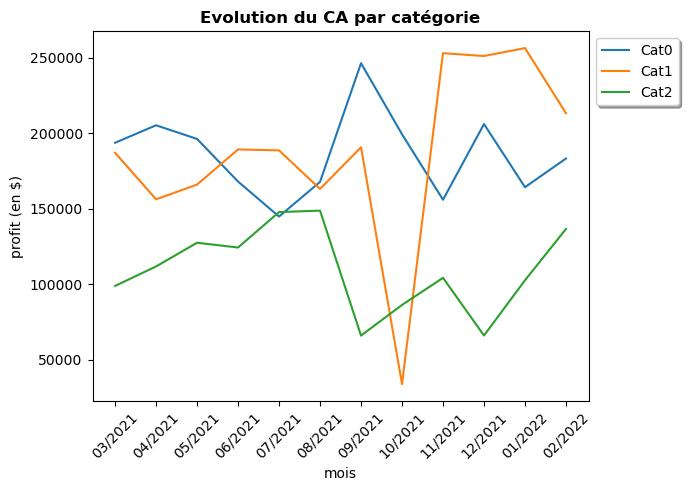

In [161]:
plt.plot(transac_categ0['month_year'],transac_categ0['CA'],label = 'Cat0')
plt.plot(transac_categ1['month_year'],transac_categ1['CA'],label = 'Cat1')
plt.plot(transac_categ2['month_year'],transac_categ2['CA'],label = 'Cat2')

plt.title("Evolution du CA par catégorie", fontweight="bold")
plt.legend()
ax = plt.subplot(111)
ax.legend(bbox_to_anchor=(1.001, 1), ncol=1, fancybox=True, shadow=True)

plt.xlabel('mois')
plt.ylabel('profit (en $)')

months = ['03/2021', '04/2021', '05/2021', '06/2021', '07/2021', '08/2021', '09/2021', '10/2021', '11/2021', '12/2021', '01/2022', '02/2022']
plt.xticks(transac_categ0["month_year"], months, rotation = 45)

plt.show()

In [183]:
#Graphe 8 - Prix d'un produit par catégorie(boxplot)

price_0 = transactions_csv.loc[transactions_csv ['categ']== 0.0]
price_0



,id_prod,session_id,client_id,price,categ,month_year,CA
0,0_1483,s_18746,c_4450,4.99,0.0,2021-04,205159.67
3,0_2186,s_105936,c_4597,4.20,0.0,2021-10,199217.94
4,0_1351,s_63642,c_1242,8.99,0.0,2021-07,144711.92
5,0_1085,s_90139,c_2526,3.99,0.0,2021-09,246264.21
6,0_1508,s_82100,c_5799,8.03,0.0,2021-08,167677.82
...,...,...,...,...,...,...,...
337006,0_153,s_106129,c_682,3.99,0.0,2021-10,199217.94
337009,0_1475,s_65686,c_5607,11.99,0.0,2021-07,144711.92
337012,0_759,s_50568,c_6268,22.99,0.0,2021-06,167886.34
337013,0_1256,s_7219,c_4137,11.03,0.0,2021-03,193566.38


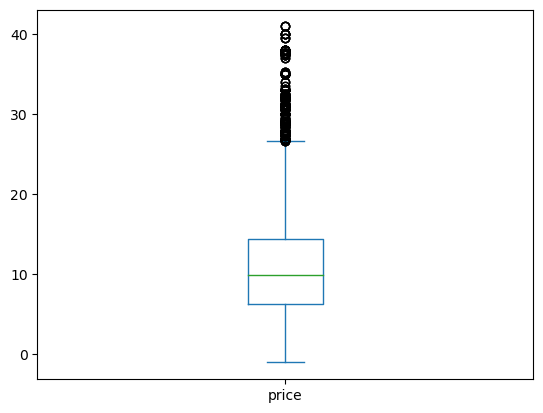

In [184]:
ax = transactions_csv[transactions_csv["categ"]==0.0]['price'].plot(kind='box')
